# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

from sklearn.utils import shuffle
#from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_dataset, y_dataset = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_dataset.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_dataset.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_dataset))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

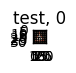

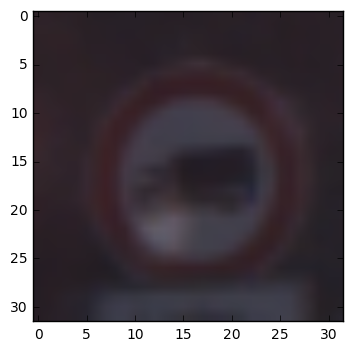

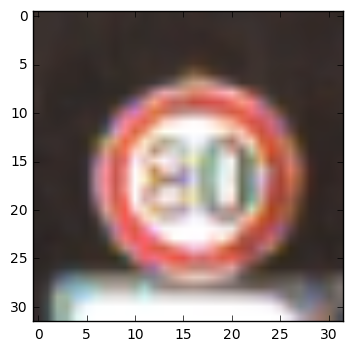

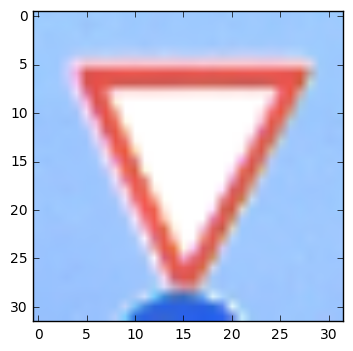

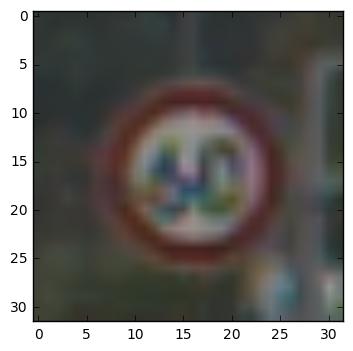

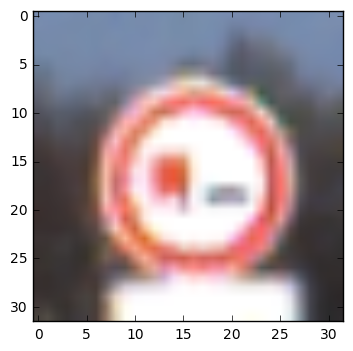

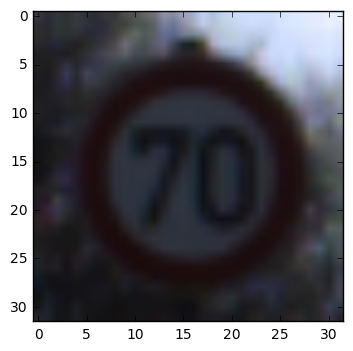

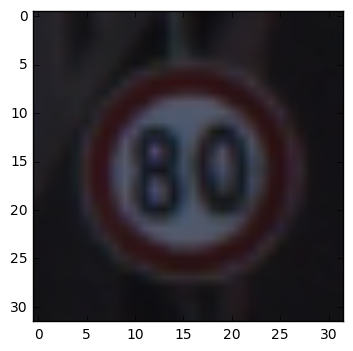

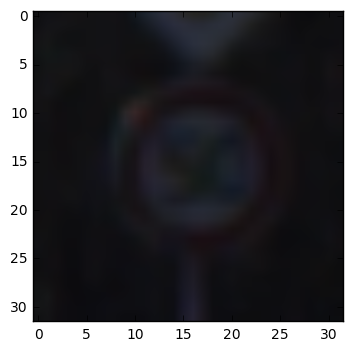

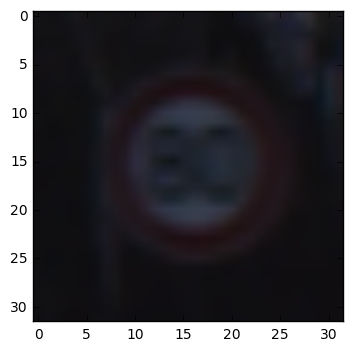

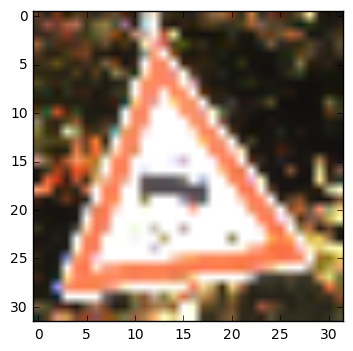

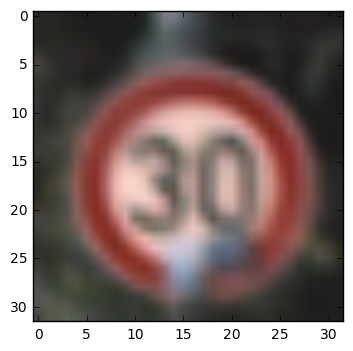

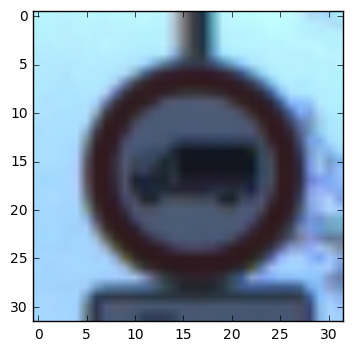

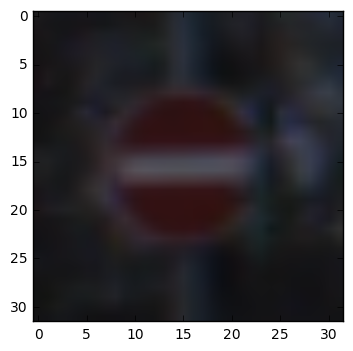

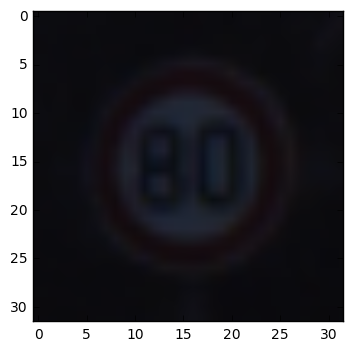

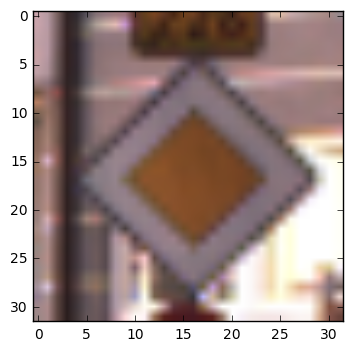

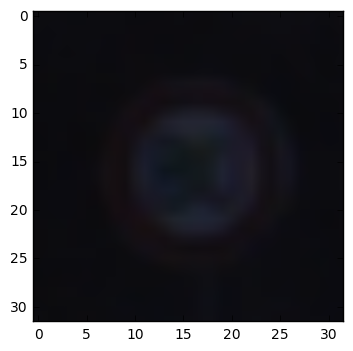

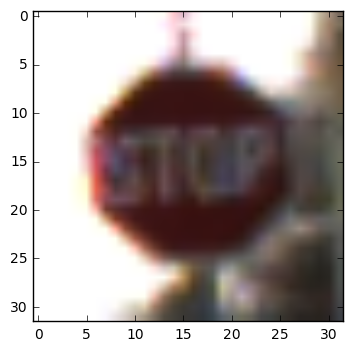

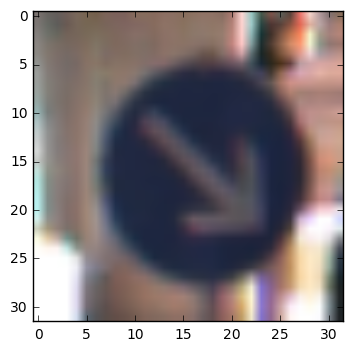

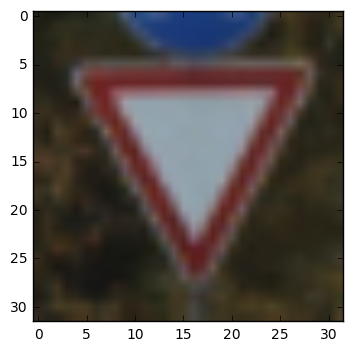

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

num_images = 20
fig = plt.figure()

indices = np.random.choice(X_dataset.shape[0], num_images)

for i in range(num_images):
    a = fig.add_subplot(num_images, 1, i+1)
    subtitle = "test, {0}".format(y_dataset[i])
    a.title.set_text(subtitle)
#    a.set_anchor('W')
    plt.imshow(X_dataset[indices[i], :, :])
#    plt.imshow(X_dataset[i, :, :])

    plt.show()

#plt.tight_layout(h_pad=1.0)
plt.show()

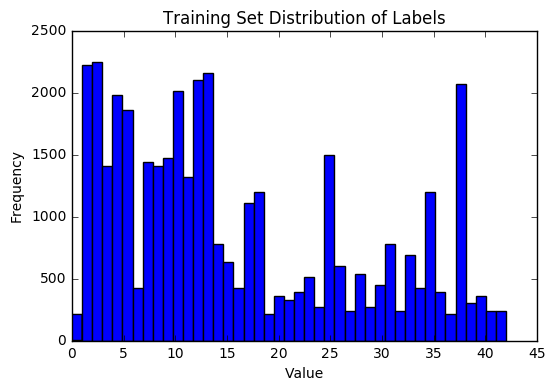

In [4]:
plt.hist(y_dataset, n_classes)

plt.title("Training Set Distribution of Labels")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def normalize(X_dataset):
    X_normalized = np.ndarray(X_dataset.shape, dtype=np.float32)
    X_normalized[:, :, :, 0] = X_dataset[:, :, :, 0] / 256
    X_normalized[:, :, :, 1] = X_dataset[:, :, :, 1] / 256
    X_normalized[:, :, :, 2] = X_dataset[:, :, :, 2] / 256

    return X_normalized

X_normalized = normalize(X_dataset)
X_test = normalize(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I normalized the color channel data by dividing each channel value by 256 to get smaller numbers between 0-1. I tried converting to grayscale and normalizing but it worsened validation accuracy so I kept this part simple.

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import math
import random

def train_test_split_by_track(X_dataset, y_dataset):

    flatten = lambda l: [item for sublist in l for item in sublist]

    groups = math.ceil(X_dataset.shape[0] / 30)

    X_validation_list = []
    y_validation_list = []
    X_train_list = []
    y_train_list = []

    tracks_by_class = {}
    validation_tracks = []
    train_tracks = []

    for i in range(0, groups):
        #print(i)
        #row = X_dataset[i]
        x_track = X_dataset[i*30:i*30+30, :]
        y_track = y_dataset[i*30:i*30+30]

        label = y_dataset[i*30]
        tracks_by_class.setdefault(label, []).append([x_track, y_track])

    # select one track from each class at random and add it to the validation set, add remaining tracks  to the training set

    #print(x_track.shape)
    #print(row.shape)

    for key, value in tracks_by_class.items():
        track_size = len(value)
        # print(track_size)
        random_track_index = random.randint(0, track_size - 1)
        random_track = value[random_track_index]
        # print("random track size")
        # print(random_track[0].shape)
        validation_tracks.append(random_track)

        # remove the randomly selected track leaving the rest of the classes
        # tracks
        value.pop(random_track_index)
        train_tracks.append(value)

    X_validation_list = list(map(lambda x: x[0].tolist(), validation_tracks))
    y_validation_list = list(map(lambda x: x[1].tolist(), validation_tracks))

    X_validation_list = flatten(X_validation_list)
    y_validation_list = flatten(y_validation_list)

    print("X_validation_list size: ", len(X_validation_list))
    print("y_validation_list size: ", len(y_validation_list))

    X_validation = np.array(X_validation_list)
    y_validation = np.array(y_validation_list)

    train_tracks = flatten(train_tracks)

    X_train_list = list(map(lambda x: x[0].tolist(), train_tracks))
    y_train_list = list(map(lambda x: x[1].tolist(), train_tracks))

    X_train_list = flatten(X_train_list)
    y_train_list = flatten(y_train_list)

    print("X_train_list size: ", len(X_train_list))
    print("y_train_list size: ", len(y_train_list))

    X_train = np.array(X_train_list)
    y_train = np.array(y_train_list)

    # # shuffle the examples
    X_train, y_train = shuffle(X_train, y_train)
    X_validation, y_validation = shuffle(X_validation, y_validation)

    return (X_train, X_validation, y_train, y_validation)


X_train, X_valid, y_train, y_valid = train_test_split_by_track(X_normalized, y_dataset)


X_validation_list size:  1290
y_validation_list size:  1290
X_train_list size:  37919
y_train_list size:  37919


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
My first attempt at creating a validation dataset used a naive, albeit simple, approach by taking a random 10% of the training data and using that as the validation set. However this method led to a very low validation accuracy.

My next attempt was to use 33% of the training data as a validation set which lead to much better results.

After reading the referenced paper (Traffic Sign Recognition with Multi-Scale Convolutional Networks) I decided to use their method of seperating the data into 30 frame video tracks for each class and randomly choose one track per class to use as the validation set which is what the code does above.

In [7]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

# TODO: use mu and sigma when calling truncated_normal

def LeNet(x, image_size, image_channels, n_classes):
    # Hyperparameters
    mu = 0
    sigma = 0.01

    print(x)

    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # [height, width, input_depth, output_depth]

    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))

    # out_height = ceil(float(32 - 5 + 1) / float(1)) = 28
    # out_width = ceil(float(32 - 5 + 1) / float(1)) = 28

    conv1_W = tf.Variable(tf.truncated_normal([5, 5, image_channels, 6], mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))

    strides = 1
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, conv1_b)

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    print(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    k = 2
    conv1 = tf.nn.max_pool(conv1,
                           ksize=[1, k, k, 1],
                           strides=[1, k, k, 1],
                           padding='VALID')

    print(conv1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))

    strides = 1
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, strides, strides, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, conv2_b)

    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    print(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    k = 2
    conv2 = tf.nn.max_pool(conv2,
                           ksize=[1, k, k, 1],
                           strides=[1, k, k, 1],
                           padding='SAME')

    print(conv2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flattened_conv2 =  tf.contrib.layers.flatten(conv2)
    print(flattened_conv2)

    # TODO use this method
    # fc1_shape = (fc1.get_shape().as_list()[-1], 120)

    # NOTE: You might have set fc1_shape to (400, 120) manually. That would be fine since that's the correct output shape. However, at some point you might want to alter a previous layer, which might change the output shape of Pooling Layer 2. In that case, hard-coding the shape of Fully Connected Layer 1 to (400, 120) would be incorrect. So it's more robust to use the formula above to set the shape.


    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal([5*5*16, 120], mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(flattened_conv2, fc1_W), fc1_b)

    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal([120, 84]))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1, fc2_W), fc2_b)

    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal([84, n_classes]))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)

    return logits


In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# see the LeNet model above

In [8]:
# I'm loading my test images up here
# since I was having trouble saving and restoring the trained model.

from PIL import Image
import os, os.path

def get_test_data():

    X_test_images = []
    y_test_images = []

    for f in os.listdir("test_images"):
        parts = os.path.splitext(f)
        label = int(parts[0].split("_")[1])

        image = Image.open("test_images/{0}".format(f))
        # print(image)

        data = np.array(image, dtype="int32" )

        # print(data.shape)

        y_test_images.append(label)
        X_test_images.append(data)

    # print(X_test_images[0])
    # print(y_test_images)

    y_test_images = np.array(y_test_images)
    X_test_images = np.array(X_test_images)

    return (normalize(X_test_images), y_test_images)

X_my_test, y_my_test = get_test_data()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My current final architecture was just a reuse of the LeNet convolutional model from the previous lab as this was suggested as a good starting point. I wanted to experiment with the architecture in the referenced paper however I haven't done so yet due to current time constraints.

My plan is to submit this project using the LeNet model and if I have some additional time before the final due date I will try some additional model architecture experimentation.



In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 35
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001
#rate = 0.0001

image_size = 32
image_channels = X_train.shape[3]
# print(image_channels)

# training pipeline
logits = LeNet(x, image_size, image_channels, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# evaluation function
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            #print(offset)
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

    test_accuracy = evaluate(X_test, y_test)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))

    my_test_accuracy = evaluate(X_my_test, y_my_test)
    #print("My Images Test Accuracy = {:.3f}".format(my_test_accuracy))

    my_test_logits = sess.run(logits, feed_dict={x: X_my_test, y: y_my_test})

    soft_predictions = sess.run(tf.nn.softmax(my_test_logits))
    #print(soft_predictions)

    top_k = sess.run(tf.nn.top_k(soft_predictions, 5))



Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("Relu_1:0", shape=(?, 10, 10, 16), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(?, 400), dtype=float32)
Training...

EPOCH 1 ...
Validation Accuracy = 0.500

EPOCH 2 ...
Validation Accuracy = 0.615

EPOCH 3 ...
Validation Accuracy = 0.711

EPOCH 4 ...
Validation Accuracy = 0.753

EPOCH 5 ...
Validation Accuracy = 0.770

EPOCH 6 ...
Validation Accuracy = 0.805

EPOCH 7 ...
Validation Accuracy = 0.769

EPOCH 8 ...
Validation Accuracy = 0.836

EPOCH 9 ...
Validation Accuracy = 0.815

EPOCH 10 ...
Validation Accuracy = 0.816

EPOCH 11 ...
Validation Accuracy = 0.827

EPOCH 12 ...
Validation Accuracy = 0.827

EPOCH 13 ...
Validation Accuracy = 0.820

EPOCH 14 ...
Validation Accuracy = 0.815

EPOCH 15 ...
Validation Accuracy = 0.830

EPOCH 16 ...
Validat

In [11]:
print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.879


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
 I trained the model using tensorflow's AdamOptimizer since we used that in the LeNet lab. The GradientDescentOptimizer could have used as well.
 
I reused the batch size of 128 since that worked well in the previous lab. I tried experimenting with this value but it wasn't much help and my system has plenty of memory.

I experimented with the number of epochs quite a bit. First using 10 epochs to get a baseline and to quickly try out other hyperparameters with. I experimented with 10, 20, 30, 40, 60, and 80 epochs. While I did not implement an Early Stopping training loop, qualitatively 40 epochs seemed to be about where the increase in validation accuracy stops and overfitting is most likely to begin.
 
 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My approach was to get the LeNet model working first and then experiment further. This proved more difficult then I initially thought because of a couple key ideas that I missed in the LeNet lab. I initially could not get validation accuracy above 10% using the LeNet model.

I had initially not used the mu and sigma values when intiallizing the truncated normal weight tensors in the LeNet lab. These proved vital to get a working solution in this project however.

Also I intially tried a very high learning rate of .01 which I thought was sufficient. After trying .001 I was finally able to getting training and validation accuracy above 85%.

I experimented with different normalization strategies of the color channels as mentioned above. I tried no normalization, grayscale conversion plus normalization, and normalization on its own and eventually settled with just simply normalizing the color channels by dividing each by 256.

The LeNet model was suggested as a suitable architecture for this problem so I started with that. My hopes were to experiment with the architecture described in the paper Traffic Sign Recognition with Multi-Scale Convolutional Networks, but I was short on time for project submittal. I hope to try this out in the future.

I also wished to try and create a jittered dataset as described in that paper but due to time wasn't able to give it a shot.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# I loaded the images above

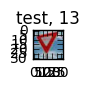

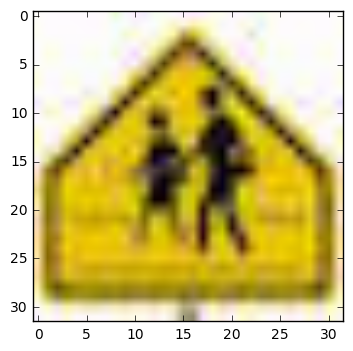

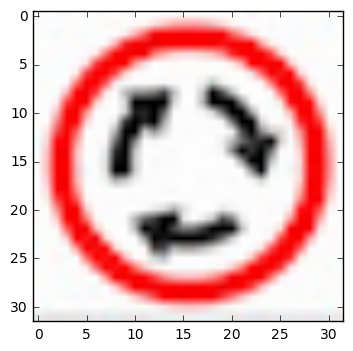

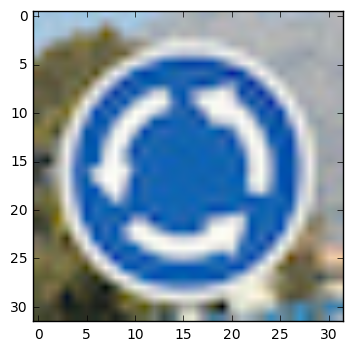

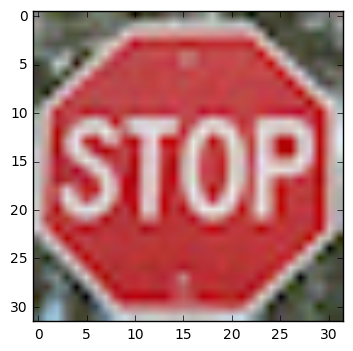

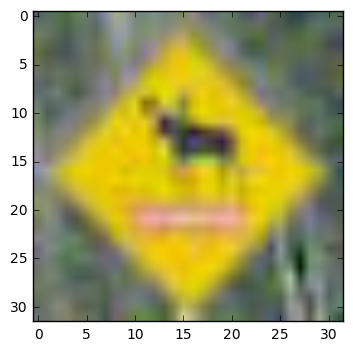

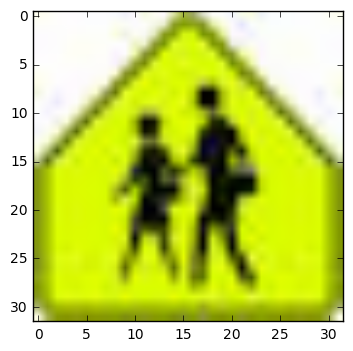

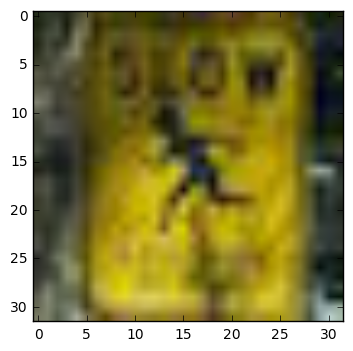

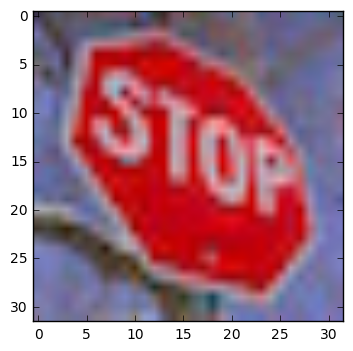

In [9]:
num_images = X_my_test.shape[0]
fig = plt.figure()

for i in range(num_images):
    a = fig.add_subplot(num_images, 1, i+1)
    subtitle = "test, {0}".format(y_my_test[i])
    a.title.set_text(subtitle)
    plt.imshow(X_my_test[i, :, :])
    plt.show()

plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I used 9 images I hope that was ok. 

2 of the images are taken from non-direct angles so the classifier would benefit from being trained with some jittered data that was not just head on photos. I've plotted all the images above.

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

print("Test Accuracy = {:.3f}".format(my_test_accuracy))


Test Accuracy = 0.333


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
My model did not perform as well on my captured pictures as on the test set. The accuracy on the 9 images was 33%. 

In [17]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

np.set_printoptions(suppress=True)
print(soft_predictions)

[[ 0.          0.          0.          0.0000001   0.          0.          0.
   0.          0.          0.00000002  0.          0.00107225  0.9220708
   0.          0.00000031  0.          0.          0.00000209  0.          0.
   0.07674077  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.00010277
   0.          0.00000201  0.          0.          0.          0.          0.
   0.          0.00000885  0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.99989438  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.00010546  0.          0.
   0.0000001   0.00000004  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.  

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The model seems certain about all its predictions as most examples have on class that it is over 90% certain of. The 3rd example however it is 100% certain of, which is the white roundabout image which it correctly classified.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [16]:
np.set_printoptions(suppress=True)
print(top_k)

TopKV2(values=array([[ 0.9220708 ,  0.07674077,  0.00107225,  0.00010277,  0.00000885],
       [ 0.99989438,  0.00010546,  0.0000001 ,  0.00000004,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.99999952,  0.00000028,  0.00000016,  0.        ,  0.        ],
       [ 0.99999988,  0.00000017,  0.        ,  0.        ,  0.        ],
       [ 0.99999714,  0.00000285,  0.00000002,  0.        ,  0.        ],
       [ 0.998061  ,  0.00193851,  0.00000049,  0.        ,  0.        ],
       [ 0.93397307,  0.05787543,  0.00799187,  0.00010468,  0.00004477],
       [ 0.99945837,  0.00054018,  0.00000134,  0.00000003,  0.00000001]], dtype=float32), indices=array([[12, 20, 11, 32, 41],
       [14, 25, 28, 29, 20],
       [12, 14, 38, 32, 40],
       [40, 32,  7, 33,  8],
       [14, 25, 12,  1, 29],
       [14, 25, 29, 22,  7],
       [25, 14, 20, 28, 29],
       [14,  1, 29,  0, 24],
       [14, 12, 25,  3, 32]], dtype=int32))
